to do: 

prediction 

machine learning??

# Imports

Here I import all the packages I need for the analysis.

In [1]:
# Imports

# Numpy for dealing with arrays

import numpy as np

# Pandas for dealing with dataframes

import pandas as pd

# MatPlotLib for creating plots

import matplotlib.pyplot as plt

# Colors from MatPlotLib for more control over colour schemes

from matplotlib import colors

# Seaborn for creating plots

import seaborn as sns

# Data Loading

Here I import the data for analysis. I import the data found in the iris folder and assign names to the columns.

I then print out a preview of the data so I know what I'm working with.

In [2]:
# Loading data from file assigning names to the columns.

data = pd.read_csv(
    './iris/iris.data',
    names=[
        'Sepal Length in cm',
        'Sepal Width in cm',
        'Petal Length in cm',
        'Petal Width in cm',
        'Class'
    ]
)

data.head()

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Setting Variables for later use.

In [3]:
# Getting the dataframe without the class column to perform analysis later.

data_no_class = data.drop(columns=['Class'])

# Separating the data by class.

setosa_data = data_no_class[0:49]
versicolor_data = data_no_class[50:99]
virginica_data = data_no_class[100:149]

# Separating by feature

sepal_length = data['Sepal Length in cm']
sepal_width = data['Sepal Width in cm']
petal_length = data['Petal Length in cm']
petal_width = data['Petal Width in cm']

# Separating by feature and species.

setosa_petal_length = setosa_data['Petal Length in cm']
setosa_petal_width = setosa_data['Petal Width in cm']
setosa_sepal_length = setosa_data['Sepal Length in cm']
setosa_sepal_width = setosa_data['Sepal Width in cm']

versicolor_petal_length = versicolor_data['Petal Length in cm']
versicolor_petal_width =  versicolor_data['Petal Width in cm']
versicolor_sepal_length = versicolor_data['Sepal Length in cm']
versicolor_sepal_width =  versicolor_data['Sepal Width in cm']

virginica_petal_length = virginica_data['Petal Length in cm']
virginica_petal_width =  virginica_data['Petal Width in cm']
virginica_sepal_length = virginica_data['Sepal Length in cm']
virginica_sepal_width =  virginica_data['Sepal Width in cm']

## References used

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Here I checked the read_csv documentation to help with importing the data correctly using the names keyword argument to add headers to my columns.

# Describing the Data

Here I export the description of the data to file. I then print out the description of the data.

In [4]:
# Getting data description.

description = data.describe()

# Exporting to csv file.

description.to_csv('iris.describe',sep=',')

description

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## References used

- https://www.geeksforgeeks.org/how-to-export-pandas-dataframe-to-a-csv-file/

Here I checked a reference to see how to export to csv file.

# Creating Histograms

In this section I create histograms with cutsom colouring for each bar based on its relative size. I do this for each feature of the data.

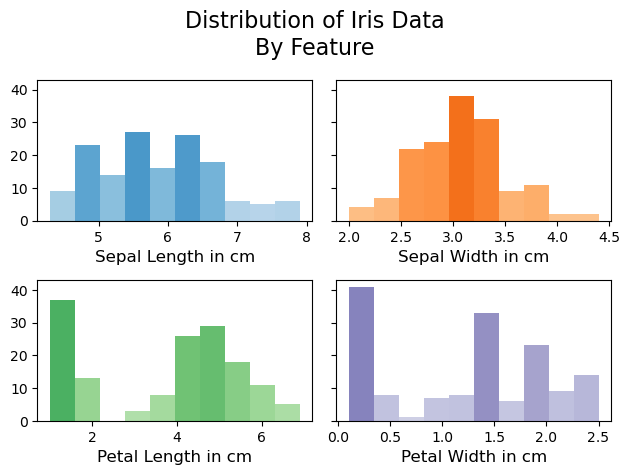

In [5]:
# Creating a 2 by 2 grid of plots that share a y axis 
# with the padding around the plots adjusted.

fig, ax = plt.subplots(2,2, tight_layout=True, sharey=True)

# Creating histograms in each of the 4 plots.
# The hist function returns 3 elements: 
# N: The values of the histogram bins.
# bins: The edges of the bins.
# patches: Container of individual artists used to create the histogram.

N, bins, patches = ax[0,0].hist(x=sepal_length)

# Setting label for the axis.

ax[0,0].set_xlabel('Sepal Length in cm', fontsize=12)

# Getting a fraction of the maximum for each bin so they can be colour coded later

fracs = N/N.max()

# Setting the colour map to span the full range of values
# by linearly mapping the values in the selected interval
# to values between 0 and 1.

norm = colors.Normalize(fracs.min(), fracs.max())

# Looping through the objects and setting colours for each 
# based on the fractions calculater earlier.
# The fraction has been slightly altered to take just a 
# section of the colour map so they aren't too dark or too light.

for thisfrac, thispatch in zip(fracs, patches):
    colour = plt.cm.Blues(norm(thisfrac)*0.3+0.3)
    thispatch.set_facecolor(colour)

# Process repeated for each axis.

N, bins, patches = ax[0,1].hist(x=sepal_width)
ax[0,1].set_xlabel('Sepal Width in cm', fontsize=12)

fracs = N/N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    colour = plt.cm.Oranges(norm(thisfrac)*0.3+0.3)
    thispatch.set_facecolor(colour)

N, bins, patches = ax[1,0].hist(x=petal_length)
ax[1,0].set_xlabel('Petal Length in cm', fontsize=12)

fracs = N/N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    colour = plt.cm.Greens(norm(thisfrac)*0.3+0.3)
    thispatch.set_facecolor(colour)

N, bins, patches = ax[1,1].hist(x=petal_width)
ax[1,1].set_xlabel('Petal Width in cm', fontsize=12)

fracs = N/N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    colour = plt.cm.Purples(norm(thisfrac)*0.3+0.3)
    thispatch.set_facecolor(colour)

# Creating a title and setting fontsize and placement.

fig.suptitle('Distribution of Iris Data\nBy Feature', fontsize=16)

# Exporting to png file.

plt.savefig('histogram.png')
plt.show()


## References used

- https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py

I used this tutorial to get some inspiration as to how to create plots most effectively and how best to organise my code.

- https://matplotlib.org/stable/gallery/statistics/hist.html

Here I checked examples of histogram uses to see how they were used and to see if there were any options I wanted to include in my implementation. 

I implemented some of the colour selection from the example and edited it to include the colours I plan to use in this series of tasks.

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

I checked the documentation for pyplot.hist to understand what the function returns and to understand the implemented code better.

- https://matplotlib.org/stable/users/explain/colors/colormaps.html

The colormaps documentation contains examples of the available colour maps. I used it to make an decision about which colour mapping I would like to use in this case.

- https://stackoverflow.com/questions/30019671/why-does-my-xlabel-not-show-up-its-not-getting-cut-off

I found this page while trying to research why some of the axis labels were not displaying properly. From this I took the tight_layout=True option when creating the axes. It helped to display the axes labels.

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots

This reference contains the documentation for subplots. It helped me to set up four individual axes in one figure. It made me aware of the sharey option which was implemented here.

- https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/figure_title.html

This example helped me to get neater title text and to understand how to set figure and axis titles.

# Creating Box Plots



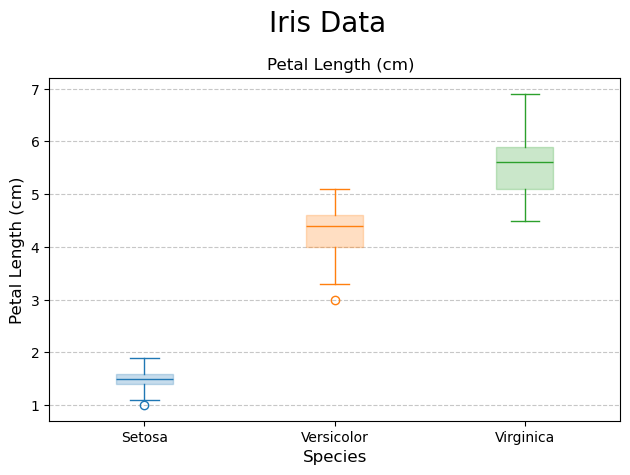

In [6]:
# Creating figure.

fig, ax = plt.subplots(tight_layout=True)

# Creating NumPy array for boxplot.

petal_length_by_species = np.array([setosa_petal_length, versicolor_petal_length, virginica_petal_length])

# Creating boxplot, using transposed array and coloured boxes.

bp = ax.boxplot(petal_length_by_species.T, patch_artist=True)

# Individual boxplot colour settings in returned dictionary.

bp['medians'][0].set_color('tab:blue')
bp['boxes'][0].set_color('tab:blue')
bp['boxes'][0].set_alpha(0.25)
bp['whiskers'][0].set_color('tab:blue')
bp['whiskers'][1].set_color('tab:blue')
bp['caps'][0].set_color('tab:blue')
bp['caps'][1].set_color('tab:blue')
bp['fliers'][0].set_markeredgecolor('tab:blue')
bp['medians'][1].set_color('tab:orange')
bp['boxes'][1].set_color('tab:orange')
bp['boxes'][1].set_alpha(0.25)
bp['whiskers'][2].set_color('tab:orange')
bp['whiskers'][3].set_color('tab:orange')
bp['caps'][2].set_color('tab:orange')
bp['caps'][3].set_color('tab:orange')
bp['fliers'][1].set_markeredgecolor('tab:orange')
bp['medians'][2].set_color('tab:green')
bp['boxes'][2].set_color('tab:green')
bp['boxes'][2].set_alpha(0.25)
bp['whiskers'][4].set_color('tab:green')
bp['whiskers'][5].set_color('tab:green')
bp['caps'][4].set_color('tab:green')
bp['caps'][5].set_color('tab:green')

# Setting labels and titles.

plt.suptitle('Iris Data', fontsize=20, x=0.52)
ax.set_title("Petal Length (cm)", fontsize=12, x=0.51)
ax.set_xlabel("Species", fontsize=12)
ax.set_ylabel("Petal Length (cm)", fontsize=12)

# Labelling each group.

ax.set_xticks([1, 2, 3], ["Setosa", "Versicolor", "Virginica"], fontsize=10)

# Adding grid lines.

ax.grid(axis="y", linestyle="--", alpha=0.7)

# Show figure.

plt.show()

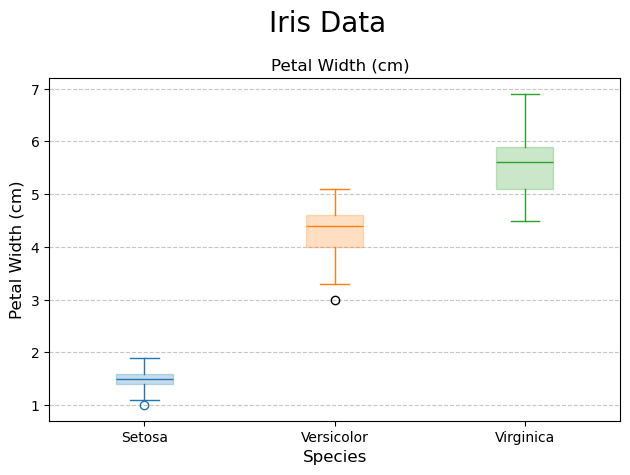

In [7]:
# Creating figure.

fig, ax = plt.subplots(tight_layout=True)

# Creating NumPy array for boxplot.

petal_width_by_species = np.array([setosa_petal_length, versicolor_petal_length, virginica_petal_length])

# Creating boxplot, using transposed array and coloured boxes.

bp = ax.boxplot(petal_width_by_species.T, patch_artist=True)

# Individual boxplot colour settings in returned dictionary.

bp['medians'][0].set_color('tab:blue')
bp['boxes'][0].set_color('tab:blue')
bp['boxes'][0].set_alpha(0.25)
bp['whiskers'][0].set_color('tab:blue')
bp['whiskers'][1].set_color('tab:blue')
bp['caps'][0].set_color('tab:blue')
bp['caps'][1].set_color('tab:blue')
bp['fliers'][0].set_markeredgecolor('tab:blue')
bp['medians'][1].set_color('tab:orange')
bp['boxes'][1].set_color('tab:orange')
bp['boxes'][1].set_alpha(0.25)
bp['whiskers'][2].set_color('tab:orange')
bp['whiskers'][3].set_color('tab:orange')
bp['caps'][2].set_color('tab:orange')
bp['caps'][3].set_color('tab:orange')
bp['medians'][2].set_color('tab:green')
bp['boxes'][2].set_color('tab:green')
bp['boxes'][2].set_alpha(0.25)
bp['whiskers'][4].set_color('tab:green')
bp['whiskers'][5].set_color('tab:green')
bp['caps'][4].set_color('tab:green')
bp['caps'][5].set_color('tab:green')

# Setting labels and titles.

plt.suptitle('Iris Data', fontsize=20, x=0.52)
ax.set_title("Petal Width (cm)", fontsize=12, x=0.51)
ax.set_xlabel("Species", fontsize=12)
ax.set_ylabel("Petal Width (cm)", fontsize=12)

# Labelling each group.

ax.set_xticks([1, 2, 3], ["Setosa", "Versicolor", "Virginica"], fontsize=10)

# Adding grid lines.

ax.grid(axis="y", linestyle="--", alpha=0.7)

# Show figure.

plt.show()

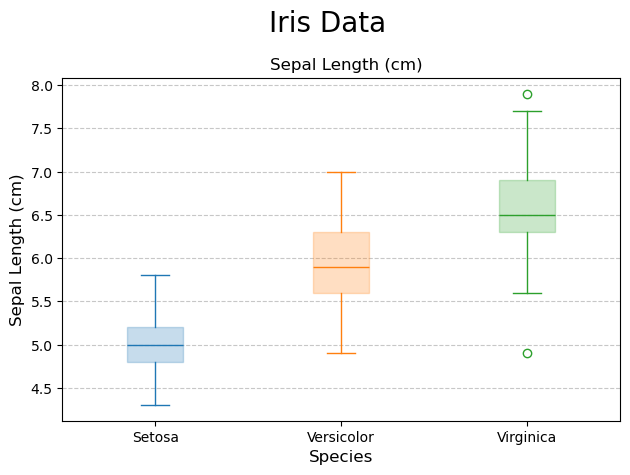

In [8]:
# Creating figure.

fig, ax = plt.subplots(tight_layout=True)

# Creating NumPy array for boxplot.

sepal_length_by_species = np.array([setosa_sepal_length, versicolor_sepal_length, virginica_sepal_length])

# Creating boxplot, using transposed array and coloured boxes.

bp = ax.boxplot(sepal_length_by_species.T, patch_artist=True)

# Individual boxplot colour settings in returned dictionary.

bp['medians'][0].set_color('tab:blue')
bp['boxes'][0].set_color('tab:blue')
bp['boxes'][0].set_alpha(0.25)
bp['whiskers'][0].set_color('tab:blue')
bp['whiskers'][1].set_color('tab:blue')
bp['caps'][0].set_color('tab:blue')
bp['caps'][1].set_color('tab:blue')
bp['medians'][1].set_color('tab:orange')
bp['boxes'][1].set_color('tab:orange')
bp['boxes'][1].set_alpha(0.25)
bp['whiskers'][2].set_color('tab:orange')
bp['whiskers'][3].set_color('tab:orange')
bp['caps'][2].set_color('tab:orange')
bp['caps'][3].set_color('tab:orange')
bp['medians'][2].set_color('tab:green')
bp['boxes'][2].set_color('tab:green')
bp['boxes'][2].set_alpha(0.25)
bp['whiskers'][4].set_color('tab:green')
bp['whiskers'][5].set_color('tab:green')
bp['caps'][4].set_color('tab:green')
bp['caps'][5].set_color('tab:green')
bp['fliers'][2].set_markeredgecolor('tab:green')

# Setting labels and titles.

plt.suptitle('Iris Data', fontsize=20, x=0.52)
ax.set_title("Sepal Length (cm)", fontsize=12, x=0.51)
ax.set_xlabel("Species", fontsize=12)
ax.set_ylabel("Sepal Length (cm)", fontsize=12)

# Labelling each group.

ax.set_xticks([1, 2, 3], ["Setosa", "Versicolor", "Virginica"], fontsize=10)

# Adding grid lines.

ax.grid(axis="y", linestyle="--", alpha=0.7)

# Show figure.

plt.show()

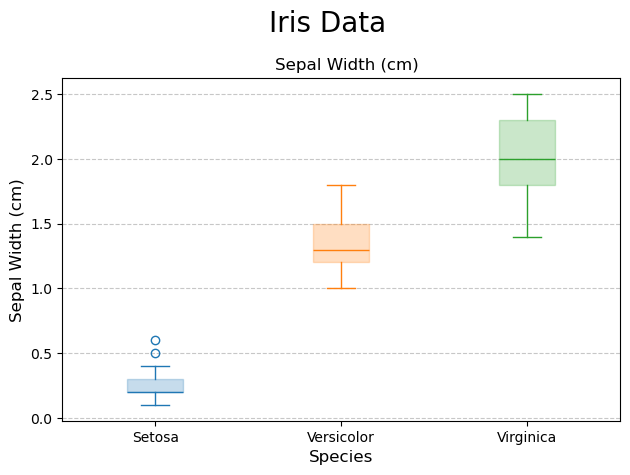

In [9]:
# Creating figure.

fig, ax = plt.subplots(tight_layout=True)

# Creating NumPy array for boxplot.

petal_width_by_species = np.array([setosa_petal_width,versicolor_petal_width,virginica_petal_width])

# Creating boxplot, using transposed array and coloured boxes.

bp = ax.boxplot(petal_width_by_species.T, patch_artist=True)

# Individual boxplot colour settings in returned dictionary.

bp['medians'][0].set_color('tab:blue')
bp['boxes'][0].set_color('tab:blue')
bp['boxes'][0].set_alpha(0.25)
bp['whiskers'][0].set_color('tab:blue')
bp['whiskers'][1].set_color('tab:blue')
bp['caps'][0].set_color('tab:blue')
bp['caps'][1].set_color('tab:blue')
bp['fliers'][0].set_markeredgecolor('tab:blue')
bp['medians'][1].set_color('tab:orange')
bp['boxes'][1].set_color('tab:orange')
bp['boxes'][1].set_alpha(0.25)
bp['whiskers'][2].set_color('tab:orange')
bp['whiskers'][3].set_color('tab:orange')
bp['caps'][2].set_color('tab:orange')
bp['caps'][3].set_color('tab:orange')
bp['medians'][2].set_color('tab:green')
bp['boxes'][2].set_color('tab:green')
bp['boxes'][2].set_alpha(0.25)
bp['whiskers'][4].set_color('tab:green')
bp['whiskers'][5].set_color('tab:green')
bp['caps'][4].set_color('tab:green')
bp['caps'][5].set_color('tab:green')

# Setting labels and titles.

plt.suptitle('Iris Data', fontsize=20, x=0.52)
ax.set_title("Sepal Width (cm)", fontsize=12, x=0.51)
ax.set_xlabel("Species", fontsize=12)
ax.set_ylabel("Sepal Width (cm)", fontsize=12)

# Labelling each group.

ax.set_xticks([1, 2, 3], ["Setosa", "Versicolor", "Virginica"], fontsize=10)

# Adding grid lines.

ax.grid(axis="y", linestyle="--", alpha=0.7)

# Show figure.

plt.show()

# Creating a Scatter plot

In this section I create a scatter plot of Sepal Length by Sepal width using matplotlib. Each class of iris is coloured differently so they are identifiable on the scatter plot.

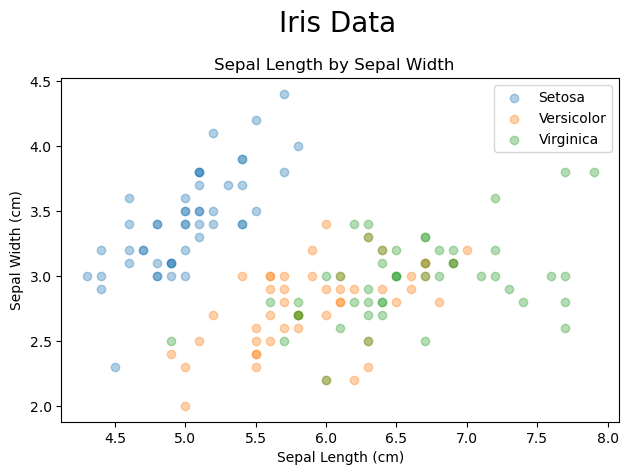

In [10]:
# Creating a single plot with adjusted padding.

fig, ax = plt.subplots(tight_layout=True)

# Creating scatter plots for each of the target variables in different colours on the same axis.
# Using c= to set marker colour and label for each variable rather than using colour mapping.

ax.scatter(sepal_length[0:49],sepal_width[0:49], c='tab:blue', label='Setosa', alpha=0.35)
ax.scatter(sepal_length[50:99],sepal_width[50:99], c='tab:orange', label='Versicolor', alpha=0.35)
ax.scatter(sepal_length[100:149],sepal_width[100:149], c='tab:green', label='Virginica', alpha=0.35)

# Setting labels for the axis.

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')

# Displaying legend.

ax.legend()

# Setting title for figure and plot.

plt.suptitle('Iris Data', fontsize=20, x=0.535)
plt.title('Sepal Length by Sepal Width', x=0.49)
plt.show()

## References used

- https://matplotlib.org/stable/gallery/color/named_colors.html

I used this reference to implement colours for each species of iris in the scatter plot.

# Using Seaborn

In this section I create a seaborn pair plot of each of the features, and displaying them as scatter, kernel density and histogram plots.

Text(0.5, 1, 'Iris Flowers by Feature')

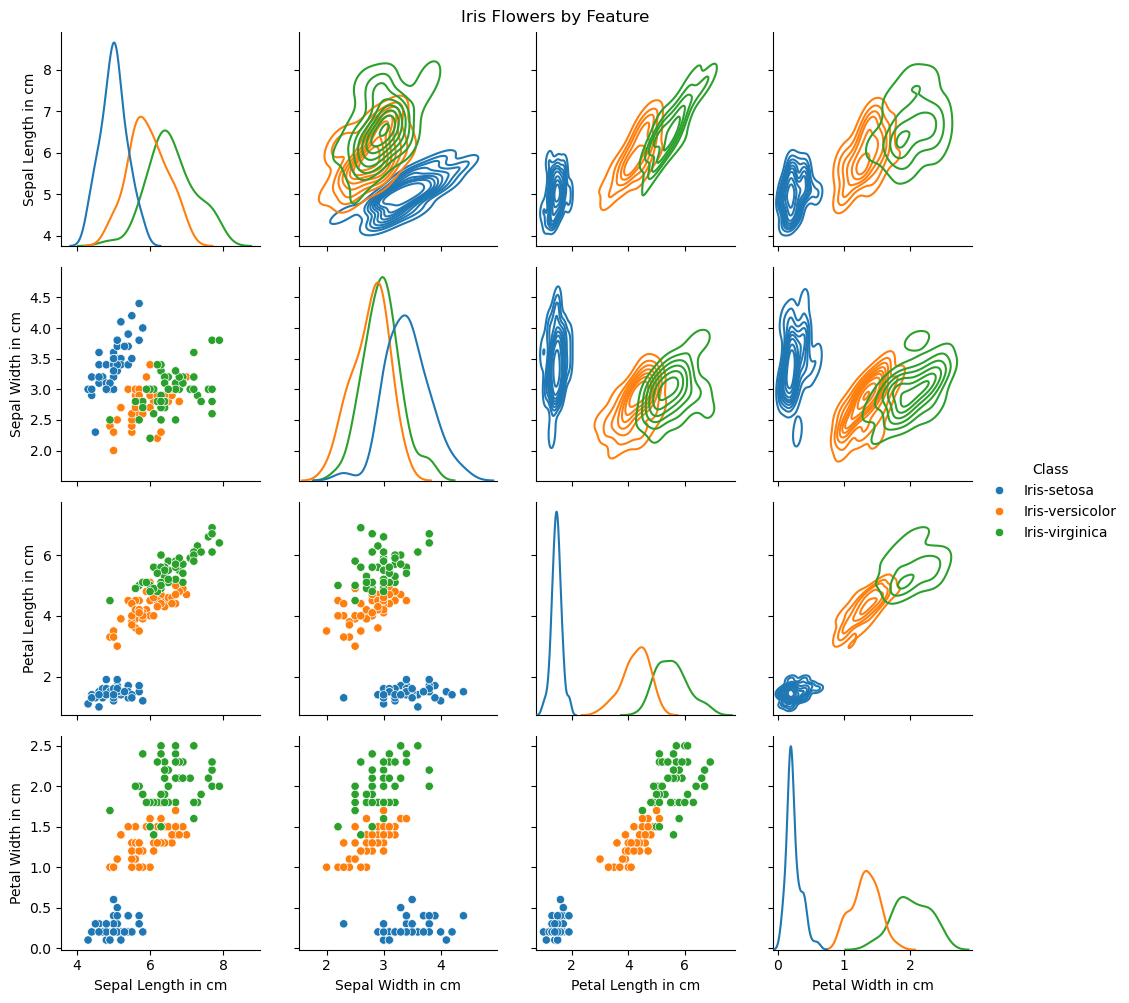

In [11]:
grid = sns.PairGrid(data, hue='Class', diag_sharey=False, layout_pad=0.5)
grid.map_upper(sns.kdeplot)
grid.map_lower(sns.scatterplot)
grid.map_diag(sns.kdeplot)
grid.add_legend()
grid.figure.suptitle('Iris Flowers by Feature', y=1)


# grid = sns.pairplot(data, hue='Class')
# grid.map_upper(sns.kdeplot)

## References used 

- https://seaborn.pydata.org/generated/seaborn.pairplot.html

Looking through the seaborn documentation for pairplot, I found the hue keyword argument which I implemented here to separate the classes in the displayed pair plot.

- https://seaborn.pydata.org/generated/seaborn.PairGrid.html

In the PairGrid documentation I found ways of displaying different types of plots in the same grid using map_upper and map_lower. I also learned how to set the diagonal not to share y so that the kde plots on the diagonal took up all the space available to give a better representation of the data.

- https://stackoverflow.com/questions/36813396/how-to-show-the-title-for-the-diagram-of-seaborn-pairplot-or-pridgrid

This reference helped me to understand how to set a title for a pairgrid using the grid.figure attribute.

# Heatmap of Pearson Correlation Coefficients

In this section I use matplotlib to create heatmaps of the Pearson correlation coefficients.

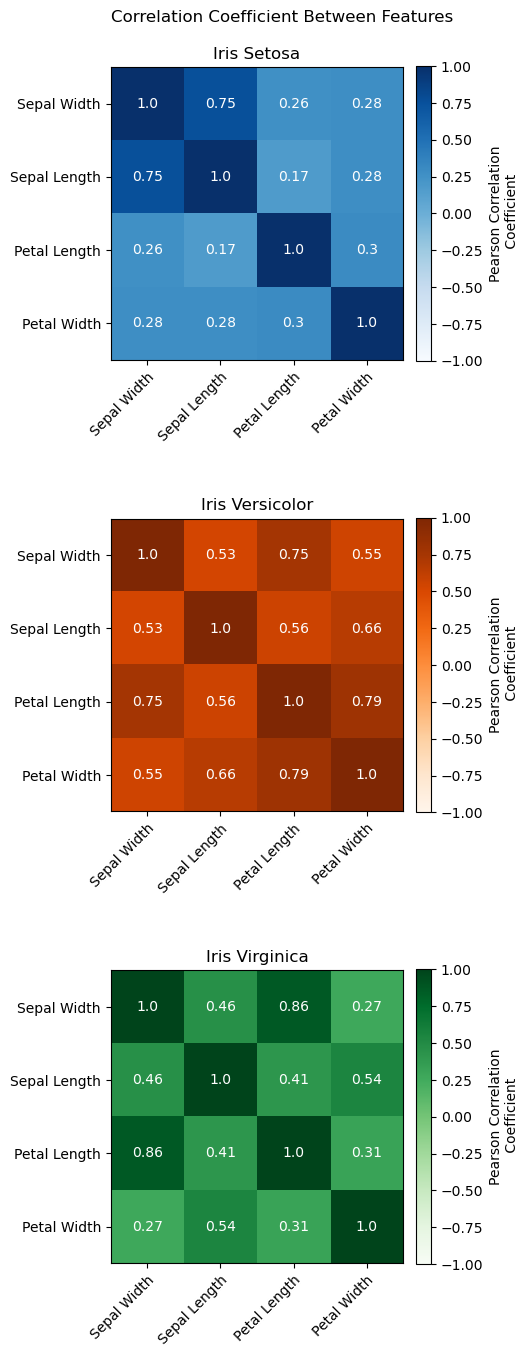

In [12]:
# Finding the pearson correlation values for each feature.

setosa_corr = setosa_data.corr()
versicolor_corr = versicolor_data.corr()
virginica_corr = virginica_data.corr()

# Creating feature name list.

feature_names = ["Sepal Width", "Sepal Length", "Petal Length", "Petal Width"]

# Turning correlation coefficient dataframes into arrays and rounding to 2 decimal places.

array_setosa = np.array(setosa_corr.round(2))
array_versicolor = np.array(versicolor_corr.round(2))
array_virginica = np.array(virginica_corr.round(2))

# Creating 3 subplots.

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 14))

# Setting figure title and layout.

fig.suptitle("Correlation Coefficient Between Features")

# Setting x and y labels for axes.

for ax in [ax1, ax2, ax3]:
    ax.set_xticks(range(len(feature_names)), labels=feature_names,
                rotation=45, ha="right", rotation_mode="anchor")
    ax.set_yticks(range(len(feature_names)), labels=feature_names)

# Creating heatmap and colourbar.
# Setting colourmap, min and max values for colourbar.
# Setting colourbar size and label

im1 = ax1.imshow(array_setosa, cmap='Blues', vmin=-1, vmax=1)
cb1 = ax1.figure.colorbar(im1, fraction=0.046, pad=0.04, label='Pearson Correlation\n Coefficient')

# Labeling heatmap sections.

for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        text = ax1.text(j, i, array_setosa[i, j],
                       ha="center", va="center", color="w")
        
# Adding title for axis.

ax1.set_title("Iris Setosa")

# Repeating above for each species.

im2 = ax2.imshow(array_versicolor, cmap='Oranges', vmin=-1, vmax=1)
cb2 = ax2.figure.colorbar(im2, fraction=0.046, pad=0.04, label='Pearson Correlation\n Coefficient')

for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        text = ax2.text(j, i, array_versicolor[i, j],
                       ha="center", va="center", color="w")
        
ax2.set_title("Iris Versicolor")

im3 = ax3.imshow(array_virginica, cmap='Greens', vmin=-1, vmax=1)
cb3 = ax3.figure.colorbar(im3, fraction=0.046, pad=0.04, label='Pearson Correlation\n Coefficient')

for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        text = ax3.text(j, i, array_virginica[i, j],
                       ha="center", va="center", color="w")
        
ax3.set_title("Iris Virginica")

fig.tight_layout()
plt.show()

## References used

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

The corr method in pandas computes pairwise correlation of columns, excluding NA/null values. It's default method is to calculate the pearson correlation coefficient.

References used:

- https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

I used this reference to find best practice for creating heatmaps. 

- https://stackabuse.com/calculating-pearson-correlation-coefficient-in-python-with-numpy/

This reference was used to understand how to find pearson correlation coefficient in python.

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html

The documentation for colour bars helped me to set the limits and labels for the colour bar.

# Lines of Best Fit

In this section I fit lines of best fit to the data.

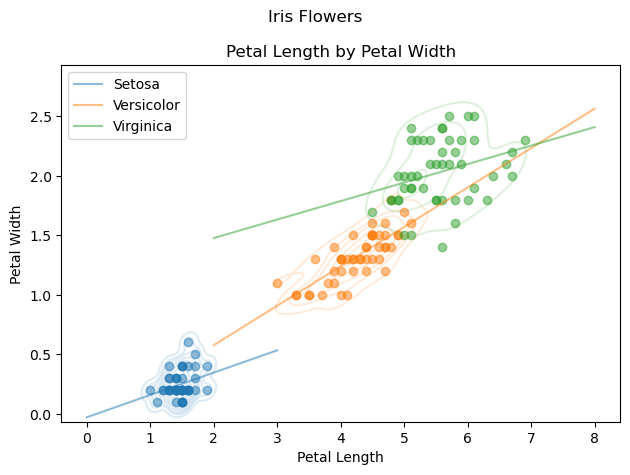

In [13]:
# Creating figure and axis

fig, ax = plt.subplots(tight_layout=True)

# Adding Seaborn kernel density plot

sns.kdeplot(data=data, x='Petal Length in cm', y='Petal Width in cm', hue='Class', alpha=0.15)

# Setting title and axis labels

fig.suptitle('Iris Flowers')
ax.set_title('Petal Length by Petal Width')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')

# Scatter plots

ax.scatter(setosa_petal_length, setosa_petal_width, color='tab:blue', alpha=0.5, marker='o')
ax.scatter(versicolor_petal_length, versicolor_petal_width, color='tab:orange', alpha=0.5, marker='o')
ax.scatter(virginica_petal_length, virginica_petal_width, color='tab:green', alpha=0.5, marker='o')

# Getting line of best fit polynomial

setosa_petal_length_petal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(setosa_petal_length, setosa_petal_width, 1)
versicolor_petal_length_petal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(versicolor_petal_length, versicolor_petal_width, 1)
virginica_petal_length_petal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(virginica_petal_length, virginica_petal_width, 1)

# Plotting line of best fit

range_petal_length_petal_width = np.linspace(2, 8, 6)
range_petal_length_petal_width_setosa = np.linspace(0, 3, 6)

ax.plot(range_petal_length_petal_width_setosa,setosa_petal_length_petal_width_polynomial(range_petal_length_petal_width_setosa), label='Setosa', alpha=0.5)
ax.plot(range_petal_length_petal_width,versicolor_petal_length_petal_width_polynomial(range_petal_length_petal_width), label='Versicolor', alpha=0.5)
ax.plot(range_petal_length_petal_width,virginica_petal_length_petal_width_polynomial(range_petal_length_petal_width), label='Virginica', alpha=0.5)

# Show legend and plot

plt.legend()
plt.show()



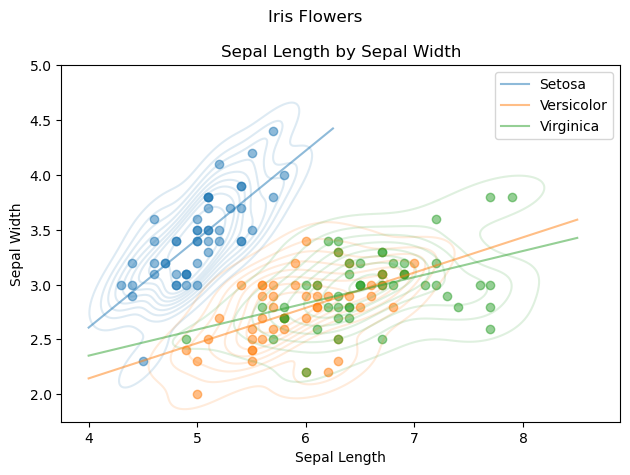

In [14]:
# Creating figure and axis

fig, ax = plt.subplots(tight_layout=True)

# Adding Seaborn kernel density plot

sns.kdeplot(data=data, x='Sepal Length in cm', y='Sepal Width in cm', hue='Class', alpha=0.15)

# Setting title and axis labels

fig.suptitle('Iris Flowers')
ax.set_title('Sepal Length by Sepal Width')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

ax.set_ylim(1.75,5)

# Scatter plots

ax.scatter(setosa_sepal_length, setosa_sepal_width, color='tab:blue', alpha=0.5, marker='o')
ax.scatter(versicolor_sepal_length, versicolor_sepal_width, color='tab:orange', alpha=0.5, marker='o')
ax.scatter(virginica_sepal_length, virginica_sepal_width, color='tab:green', alpha=0.5, marker='o')

# Getting line of best fit polynomial

setosa_sepal_length_sepal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(setosa_sepal_length, setosa_sepal_width, 1)
versicolor_sepal_length_sepal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(versicolor_sepal_length, versicolor_sepal_width, 1)
virginica_sepal_length_sepal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(virginica_sepal_length, virginica_sepal_width, 1)

# Plotting line of best fit

range_sepal_length_sepal_width = np.linspace(4, 8.5, 6)
range_sepal_length_sepal_width_setosa = np.linspace(4, 6.25, 6)

ax.plot(range_sepal_length_sepal_width_setosa,setosa_sepal_length_sepal_width_polynomial(range_sepal_length_sepal_width_setosa), label='Setosa', alpha=0.5)
ax.plot(range_sepal_length_sepal_width,versicolor_sepal_length_sepal_width_polynomial(range_sepal_length_sepal_width), label='Versicolor', alpha=0.5)
ax.plot(range_sepal_length_sepal_width,virginica_sepal_length_sepal_width_polynomial(range_sepal_length_sepal_width), label='Virginica', alpha=0.5)

# Show legend and plot

plt.legend()
plt.show()

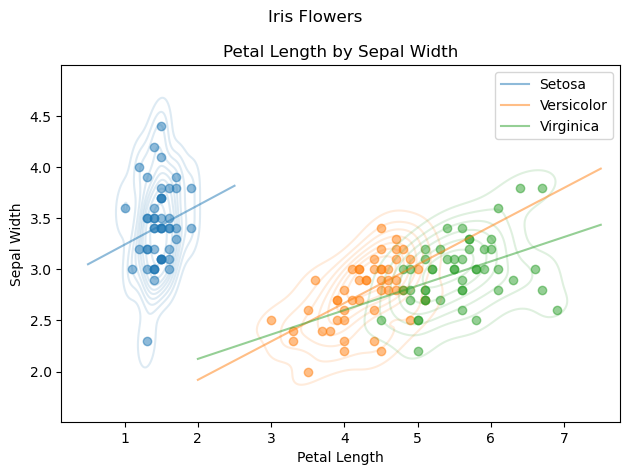

In [15]:
# Creating figure and axis

fig, ax = plt.subplots(tight_layout=True)

# Adding Seaborn kernel density plot

sns.kdeplot(data=data, x='Petal Length in cm', y='Sepal Width in cm', hue='Class', alpha=0.15)

# Setting title and axis labels

fig.suptitle('Iris Flowers')
ax.set_title('Petal Length by Sepal Width')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')

# Scatter plots

ax.scatter(setosa_petal_length, setosa_sepal_width, color='tab:blue', alpha=0.5, marker='o')
ax.scatter(versicolor_petal_length, versicolor_sepal_width, color='tab:orange', alpha=0.5, marker='o')
ax.scatter(virginica_petal_length, virginica_sepal_width, color='tab:green', alpha=0.5, marker='o')

# Getting line of best fit polynomial

setosa_petal_length_sepal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(setosa_petal_length, setosa_sepal_width, 1)
versicolor_petal_length_sepal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(versicolor_petal_length, versicolor_sepal_width, 1)
virginica_petal_length_sepal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(virginica_petal_length, virginica_sepal_width, 1)

# Plotting line of best fit

range_petal_length_sepal_width = np.linspace(2, 7.5, 6)
range_petal_length_sepal_width_setosa = np.linspace(0.5, 2.5, 6)

ax.plot(range_petal_length_sepal_width_setosa,setosa_petal_length_sepal_width_polynomial(range_petal_length_sepal_width_setosa), label='Setosa', alpha=0.5)
ax.plot(range_petal_length_sepal_width,versicolor_petal_length_sepal_width_polynomial(range_petal_length_sepal_width), label='Versicolor', alpha=0.5)
ax.plot(range_petal_length_sepal_width,virginica_petal_length_sepal_width_polynomial(range_petal_length_sepal_width), label='Virginica', alpha=0.5)

# Show legend and plot

plt.legend()
plt.show()

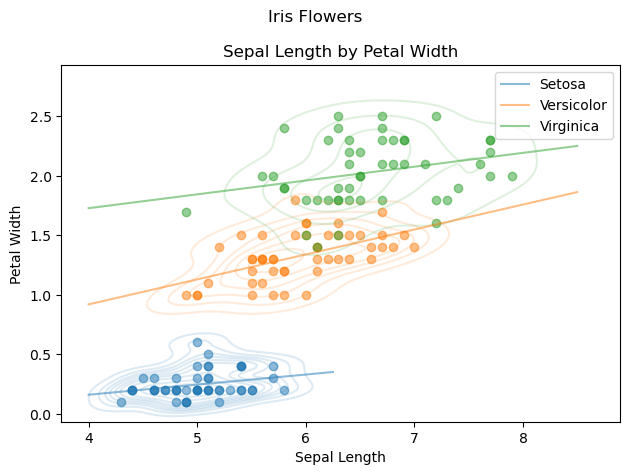

In [16]:
# Creating figure and axis

fig, ax = plt.subplots(tight_layout=True)

# Adding Seaborn kernel density plot

sns.kdeplot(data=data, x='Sepal Length in cm', y='Petal Width in cm', hue='Class', alpha=0.15)

# Setting title and axis labels

fig.suptitle('Iris Flowers')
ax.set_title('Sepal Length by Petal Width')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Width')

# Scatter plots

ax.scatter(setosa_sepal_length, setosa_petal_width, color='tab:blue', alpha=0.5, marker='o')
ax.scatter(versicolor_sepal_length, versicolor_petal_width, color='tab:orange', alpha=0.5, marker='o')
ax.scatter(virginica_sepal_length, virginica_petal_width, color='tab:green', alpha=0.5, marker='o')

# Getting line of best fit polynomial

setosa_sepal_length_petal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(setosa_sepal_length, setosa_petal_width, 1)
versicolor_sepal_length_petal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(versicolor_sepal_length, versicolor_petal_width, 1)
virginica_sepal_length_petal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(virginica_sepal_length, virginica_petal_width, 1)

# Plotting line of best fit

range_sepal_length_petal_width = np.linspace(4, 8.5, 6)
range_sepal_length_petal_width_setosa = np.linspace(4, 6.25, 6)

ax.plot(range_sepal_length_petal_width_setosa,setosa_sepal_length_petal_width_polynomial(range_sepal_length_petal_width_setosa), label='Setosa', alpha=0.5)
ax.plot(range_sepal_length_petal_width,versicolor_sepal_length_petal_width_polynomial(range_sepal_length_petal_width), label='Versicolor', alpha=0.5)
ax.plot(range_sepal_length_petal_width,virginica_sepal_length_petal_width_polynomial(range_sepal_length_petal_width), label='Virginica', alpha=0.5)

# Show legend and plot

plt.legend()
plt.show()

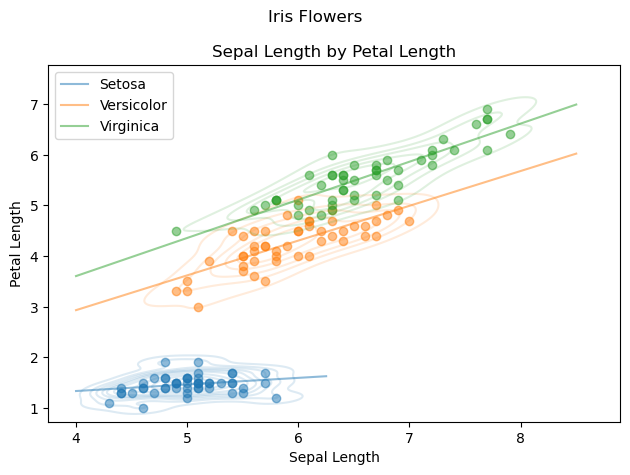

In [17]:
# Creating figure and axis

fig, ax = plt.subplots(tight_layout=True)

# Adding Seaborn kernel density plot

sns.kdeplot(data=data, x='Sepal Length in cm', y='Petal Length in cm', hue='Class', alpha=0.15)

# Setting title and axis labels

fig.suptitle('Iris Flowers')
ax.set_title('Sepal Length by Petal Length')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')

# Scatter plots

ax.scatter(setosa_sepal_length, setosa_petal_length, color='tab:blue', alpha=0.5, marker='o')
ax.scatter(versicolor_sepal_length, versicolor_petal_length, color='tab:orange', alpha=0.5, marker='o')
ax.scatter(virginica_sepal_length, virginica_petal_length, color='tab:green', alpha=0.5, marker='o')

# Getting line of best fit polynomial

setosa_sepal_length_petal_length_polynomial = np.polynomial.polynomial.Polynomial.fit(setosa_sepal_length, setosa_petal_length, 1)
versicolor_sepal_length_petal_length_polynomial = np.polynomial.polynomial.Polynomial.fit(versicolor_sepal_length, versicolor_petal_length, 1)
virginica_sepal_length_petal_length_polynomial = np.polynomial.polynomial.Polynomial.fit(virginica_sepal_length, virginica_petal_length, 1)

# Plotting line of best fit

range_sepal_length_petal_length = np.linspace(4, 8.5, 6)
range_sepal_length_petal_length_setosa = np.linspace(4, 6.25, 6)

ax.plot(range_sepal_length_petal_length_setosa,setosa_sepal_length_petal_length_polynomial(range_sepal_length_petal_length_setosa), label='Setosa', alpha=0.5)
ax.plot(range_sepal_length_petal_length,versicolor_sepal_length_petal_length_polynomial(range_sepal_length_petal_length), label='Versicolor', alpha=0.5)
ax.plot(range_sepal_length_petal_length,virginica_sepal_length_petal_length_polynomial(range_sepal_length_petal_length), label='Virginica', alpha=0.5)

# Show legend and plot

plt.legend()
plt.show()

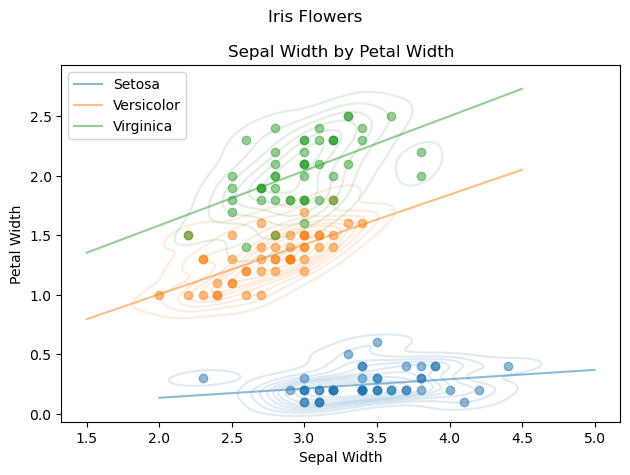

In [18]:
# Creating figure and axis

fig, ax = plt.subplots(tight_layout=True)

# Adding Seaborn kernel density plot

sns.kdeplot(data=data, x='Sepal Width in cm', y='Petal Width in cm', hue='Class', alpha=0.15)

# Setting title and axis labels

fig.suptitle('Iris Flowers')
ax.set_title('Sepal Width by Petal Width')
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')

# Scatter plots

ax.scatter(setosa_sepal_width, setosa_petal_width, color='tab:blue', alpha=0.5, marker='o')
ax.scatter(versicolor_sepal_width, versicolor_petal_width, color='tab:orange', alpha=0.5, marker='o')
ax.scatter(virginica_sepal_width, virginica_petal_width, color='tab:green', alpha=0.5, marker='o')

# Getting line of best fit polynomial

setosa_sepal_width_petal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(setosa_sepal_width, setosa_petal_width, 1)
versicolor_sepal_width_petal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(versicolor_sepal_width, versicolor_petal_width, 1)
virginica_sepal_width_petal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(virginica_sepal_width, virginica_petal_width, 1)

# Plotting line of best fit

range_sepal_width_petal_width = np.linspace(1.5, 4.5, 6)
range_sepal_width_petal_width_setosa = np.linspace(2, 5, 6)

ax.plot(range_sepal_width_petal_width_setosa,setosa_sepal_width_petal_width_polynomial(range_sepal_width_petal_width_setosa), label='Setosa', alpha=0.5)
ax.plot(range_sepal_width_petal_width,versicolor_sepal_width_petal_width_polynomial(range_sepal_width_petal_width), label='Versicolor', alpha=0.5)
ax.plot(range_sepal_width_petal_width,virginica_sepal_width_petal_width_polynomial(range_sepal_width_petal_width), label='Virginica', alpha=0.5)

# Show legend and plot

plt.legend()
plt.show()